# Regresión Logística

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
plt.style.use("ggplot")
from sklearn.preprocessing import PolynomialFeatures
from sklearn import linear_model
from sklearn.metrics import (accuracy_score,precision_score,recall_score)

In [2]:
data=pd.read_csv("../Data/ex2data2.txt",header=None)
data.head()

,0,1,2
0,0.051267,0.69956,1
1,-0.092742,0.68494,1
2,-0.213710,0.69225,1
3,-0.375000,0.50219,1
4,-0.513250,0.46564,1


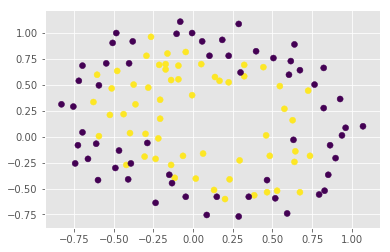

In [3]:
X=data.iloc[:,0:2]
Y=data.iloc[:,2]
plt.scatter(X[0],X[1],c=Y)
plt.show()

In [4]:
# Preparación del modelado de datos (crear el polinomio)
ngrado=7
poly=PolynomialFeatures(ngrado)
xa=poly.fit_transform(X)

In [5]:
# Crear y entrenar la regresión logística
modelo=linear_model.LogisticRegression(C=100)
modelo.fit(xa,Y)
Yhat=modelo.predict(xa)

C:\Users\USUARIO\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


In [6]:
# Evaluar al modelo
accuracy_score(Y,Yhat)
precision_score(Y,Yhat)
recall_score(Y,Yhat)

0.8620689655172413

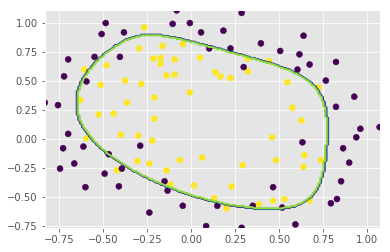

In [7]:
# Visualizar la frontera de separación
h=0.01
xmin,xmax,ymin,ymax=X[0].min(),X[0].max(),X[1].min(),X[1].max()
xx,yy=np.meshgrid(np.arange(xmin,xmax,h),np.arange(ymin,ymax,h))
Xnew=pd.DataFrame(np.c_[xx.ravel(),yy.ravel()])
Xa_new=poly.fit_transform(Xnew)
Z=modelo.predict(Xa_new)
Z=Z.reshape(xx.shape)

plt.contour(xx,yy,Z)
plt.scatter(X[0],X[1],c=Y)
plt.xlim(xmin,xmax)
plt.ylim(ymin,ymax)
plt.show()